<a href="https://colab.research.google.com/github/t8101349/Colab-/blob/master/CIFAR10_10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<p align="center">
  <img src="https://storage.googleapis.com/kaggle-competitions/kaggle/3649/media/cifar-10.png"
  />
  <center>Cifar 10 資料庫</center>
  <center>圖片來源: https://www.kaggle.com/</center>
</p>


CIFAR 10 是一個 10 類別資料，包含了：
* 飛機 (airplan)
* 交通工具 (automobile)
* 鳥 (bird)
* 貓 (cat)
* 鹿 (deer)
* 狗 (dog)
* 青蛙 (frog)
* 馬 (horse)
* 船 (ship)
* 卡車 (truck)
共10個類別的資料，在這裡，我們將讓大家練習建構在 CIFAR-10 上的 CNN 分類模型

## 1: 切換 TensorFlow 至 2.x 版

In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## 2: 載入套件及資料集

In [ ]:
%matplotlib inline
# Import some useful package
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider, BoundedIntText

# For CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D

# For training
from tensorflow.keras.optimizers import SGD, Adam, schedules
from tensorflow.keras.callbacks import EarlyStopping


# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

## 3: 資料前處理 (Data Preprocessing)

讀取 CIFAR 10 圖片資料集

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 78s 0us/step


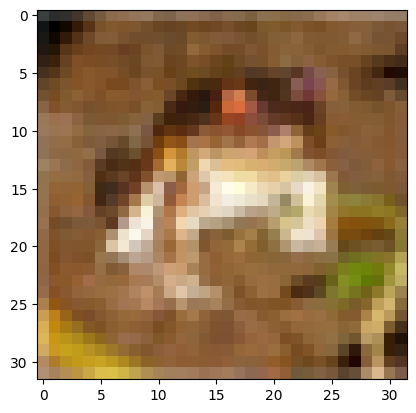

In [ ]:
plt.imshow(X_train[0])

In [ ]:
print('訓練資料格式:', X_train.shape)
print('測試資料格式:', X_test.shape)

訓練資料格式: (50000, 32, 32, 3)
測試資料格式: (10000, 32, 32, 3)


In [ ]:
print('=='+'訓練資料'+'==')
print('最小值:', X_train.min())
print('最大值:', X_train.max())

print('=='+'測試資料'+'==')
print('最小值:', X_test.min())
print('最大值:', X_test.max())

==訓練資料==
最小值: 0
最大值: 255
==測試資料==
最小值: 0
最大值: 255


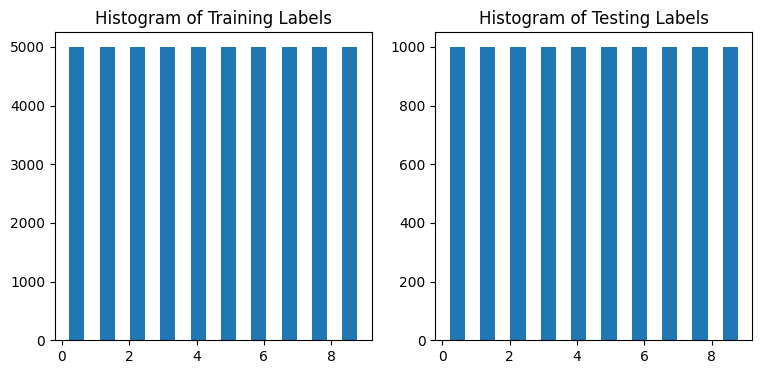

In [ ]:
plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)
plt.title('Histogram of Training Labels')
plt.hist(y_train, rwidth=0.5)

plt.subplot(1, 2, 2)
plt.title('Histogram of Testing Labels')
plt.hist(y_test, rwidth=0.5);

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
set(y_train.flatten())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
# Normalize data range
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## 4: 練習建立辨識 CIFAR-10 的卷積神經網路

在這裡，我們希望大家建立具有以下架構的卷積神經網路。

透過改變模型架構以外的其他方式，讓訓練和測試準確率都至少60%。

#### [練習] 模型架構

|超參數/層名| 卷積層  | 池化層 | 卷積層 | 池化層 || 扁平層 | 全連接層 | 全連接層 | 輸出層 |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
神經元/filter 個數| 10 | | 16 | | | | 120 | 84 | 10 |
Kernal 尺寸| (5, 5) | (2, 2) | (4, 4) | (2, 2)
|激活函數| ReLU | | ReLU | | | | ReLU | ReLU | softmax |

別忘記第一個卷積層需要指定輸入格式: (32, 32, 3)

In [ ]:
model = Sequential()

# [第一層] 第一層卷積層，注意：卷積層指定輸入資料的格式
model.add(Conv2D(10, (5, 5), input_shape=(32, 32, 3), activation='relu'))

# [第二層] 池化層
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid'))

# [第三層] 第二層卷積層
model.add(Conv2D(16, (3, 3), activation='relu'))

# [第四層] 池化層
model.add(MaxPool2D((2, 2)))

# [第三層] 第二層卷積層
model.add(Conv2D(16, (3, 3), activation='relu'))

# [第四層] 池化層
model.add(MaxPool2D((2, 2)))

# [第五層] 扁平層
model.add(Flatten())

# [第六層] 第一層全連接層
model.add(Dense(120, activation='relu'))

# [第七層] 第二層全連接層
model.add(Dense(84, activation='relu'))

# [第八層] 輸出層
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


預期模型架構：

![alt_text](https://drive.google.com/uc?id=13g5ihfnssVPNlbiijotKQAsnQy8ApiKb)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 10)          │             760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 16)          │           1,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │           7,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,350 (91.21 KB)

 Trainable params: 23,350 (91.21 KB)

 Non-trainable params: 0 (0.00 B)

### [練習] 嘗試不同設定來編譯模型

- Optimizer:
 * Stochastic Gradient Descent (SGD)
 * Adaptive Moment Estimation (Adam)
- Loss:
 * Mean Squared Error
 * Mean Abolute Error
 * Categorical cross-entropy

### 訓練模型: 透過訓練模型來學習分類資料的函數

In [ ]:
lr_schedule = schedules.ExponentialDecay(
    initial_learning_rate=5e-4,
    decay_steps=10000,
    decay_rate=0.88
)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=lr_schedule),
              metrics=['categorical_accuracy'])

In [ ]:
#earlystop
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=25,
    min_delta=0.0001,
    restore_best_weights=True,
)


In [ ]:
training_history = model.fit(X_train, y_train,
                             batch_size=128,
                             epochs=200,
                             validation_data=(X_test, y_test),
                             callbacks=[early_stopping],
                             )

Epoch 1/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - categorical_accuracy: 0.2309 - loss: 2.0543 - val_categorical_accuracy: 0.3865 - val_loss: 1.6855
Epoch 2/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - categorical_accuracy: 0.3980 - loss: 1.6325 - val_categorical_accuracy: 0.4338 - val_loss: 1.5612
Epoch 3/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - categorical_accuracy: 0.4387 - loss: 1.5395 - val_categorical_accuracy: 0.4515 - val_loss: 1.4814
Epoch 4/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - categorical_accuracy: 0.4658 - loss: 1.4611 - val_categorical_accuracy: 0.4787 - val_loss: 1.4300
Epoch 5/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - categorical_accuracy: 0.4924 - loss: 1.4028 - val_categorical_accuracy: 0.4910 - val_loss: 1.3974
Epoch 6/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - categorical_accuracy: 0.5049 - loss: 1.3701 - val_categorical_accuracy: 0.5028 - val_loss: 1.3668
Epoch 7/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - categorical_accuracy: 0.51

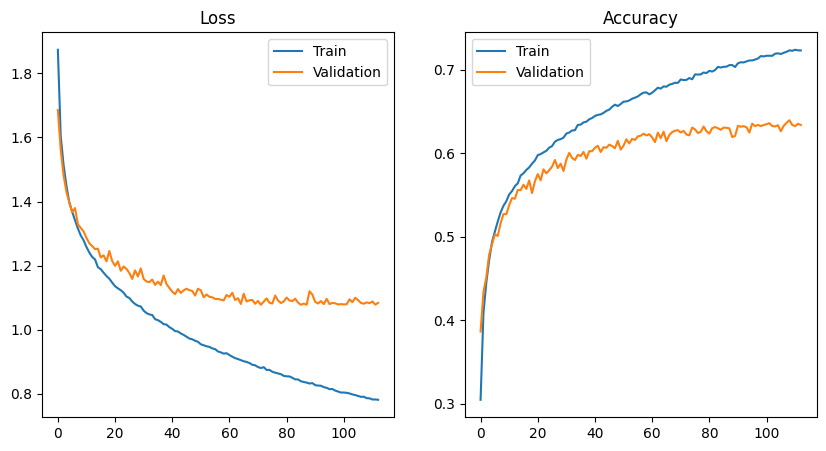

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.legend(['Train', 'Validation'])
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(training_history.history['categorical_accuracy'])
plt.plot(training_history.history['val_categorical_accuracy'])
plt.legend(['Train', 'Validation'])
plt.title("Accuracy");

## 5: 視覺化預測結果

在這部分，我們提供簡單的視覺化方法來呈現神經網路的輸入與輸出結果

In [ ]:
class_label = ['Airplan', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

def visulization(idx=0):
    # Random pick one data from training set
    # idx = np.random.randint(X_train.shape[0])
    sample_x = X_test[idx]
    sample_y = y_test[idx]
    # Predict the class of random data
    predict_y = model.predict(X_test[idx:idx+1]).squeeze()
    predict_label = predict_y.argmax()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    # Plot raw image
    ax1.imshow(sample_x, 'gray_r')
    ax1.set_title("Image Label: %s" %class_label[sample_y.argmax()])

    # Plot prediction probability of each classes
    ax2.barh(np.arange(10), predict_y)
    ax2.patches[predict_label].set_facecolor('Red')
    ax2.set_title("Prediction Result: %d" %predict_label);
    ax2.set_yticklabels(class_label)
    if sample_y.argmax()==predict_y.argmax():
        print("預測正確!")
    else:
        print("預測失敗QQ")
    plt.show()

In [ ]:
interact(visulization, idx=BoundedIntText(value=5566, min=0, max=X_test.shape[0]-1));

interactive(children=(BoundedIntText(value=5566, description='idx', max=9999), Output()), _dom_classes=('widge…